## Visualizations to compare different distance metrics used for our pairwise analysis

In [1]:
import morphs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pair_df = morphs.load.pop_pair_df()

In [3]:
for col in pair_df:
    print col, np.sum(pair_df[col].isna())

morph_dim 0
neural_euclidean_dist 0
red_neural_euclidean_dist 0
neural_correlation_dist 2521
red_neural_correlation_dist 2521
neural_cosine_dist 2588
red_neural_cosine_dist 2521
greater_morph_pos 0
lesser_morph_pos 0
morph_dist 0
spect_euclidean_dist 0
spect_correlation_dist 0
spect_cosine_dist 0
block_path 0


Things to note:
 1. I have NANs in some of the columns
 2. I believe this is due to stimuli presentations that had no recorded good spikes which would result in a neural representation of all zeros, resulting in a zero in the denominator of these metrics.
 3. I have elected to just drop these.

In [4]:
def corrfunc(x, y, **kws):
    r, _ = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(
        "r = {:.2f}".format(r),
        xy=(0.1, 0.9),
        xycoords=ax.transAxes,
    )

/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


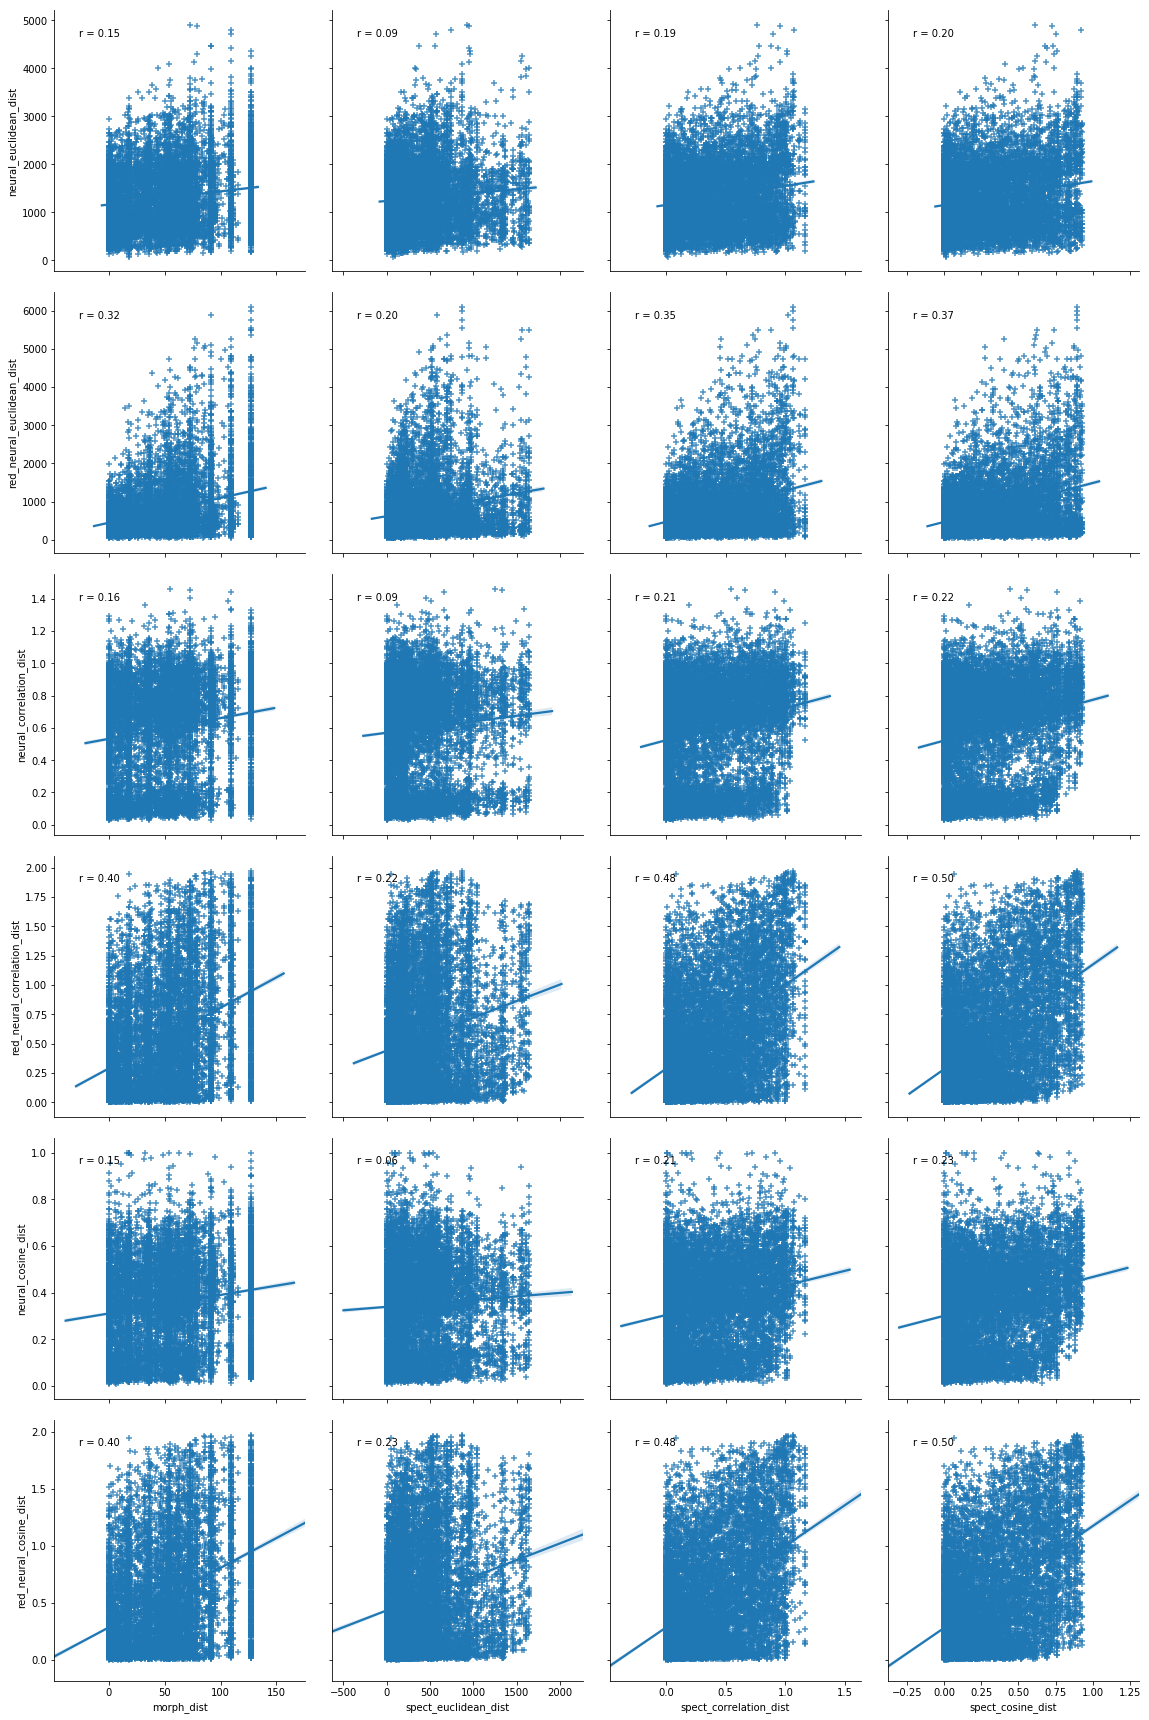

In [5]:
g = sns.pairplot(
    pair_df.sample(10000).dropna(),
    y_vars=(
        'neural_euclidean_dist',
        'red_neural_euclidean_dist',
        'neural_correlation_dist',
        'red_neural_correlation_dist',
        'neural_cosine_dist',
        'red_neural_cosine_dist',
    ),
    x_vars=(
        'morph_dist',
        'spect_euclidean_dist',
        'spect_correlation_dist',
        'spect_cosine_dist',
    ),
    markers='+',
    kind='reg',
    height=4,
)
g = g.map(corrfunc)

Things to note:
 1. Pearson correlation distance is very similar to cosine distance except that it uses the mean subtracted data instead. Since a difference in the overall activity level is meaningful and the the cosine distance correlations are higher, we elect to use cosine correlation distance, however, using Pearson correlation distance doesn't qualitatively change our results. This is seen by the similarity of rows 3 and 4 to rows 5 and 6, as well as column 3 to column 4.
 2. The reduced 24 dim representation of neural activity seems to remove much of the noise as seen by the left side of the plots in rows 2, 4, and 6 compared to rows 1, 3, and 5 (especially evident in the euclidean distance plots) and the improved pearson correlation on these plots.

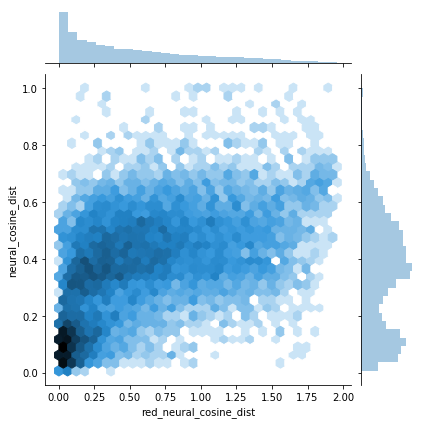

In [6]:
g = sns.jointplot(
    data=pair_df.sample(10000),
    x='red_neural_cosine_dist',
    y='neural_cosine_dist',
    kind='hex',
    bins='log',
)

The improvement from the reduced 24 dimensional space may be due to getting rid of the bi-modality of the neural distances

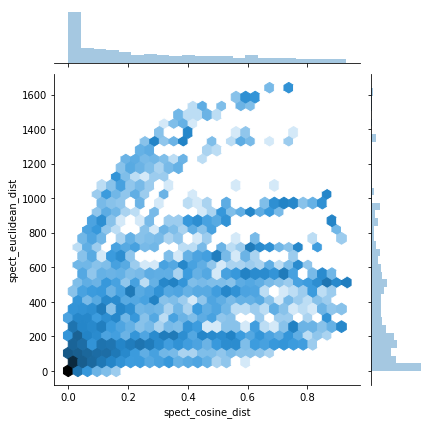

In [7]:
g = sns.jointplot(
    data=pair_df.sample(10000),
    x='spect_cosine_dist',
    y='spect_euclidean_dist',
    kind='hex',
    bins='log',
)

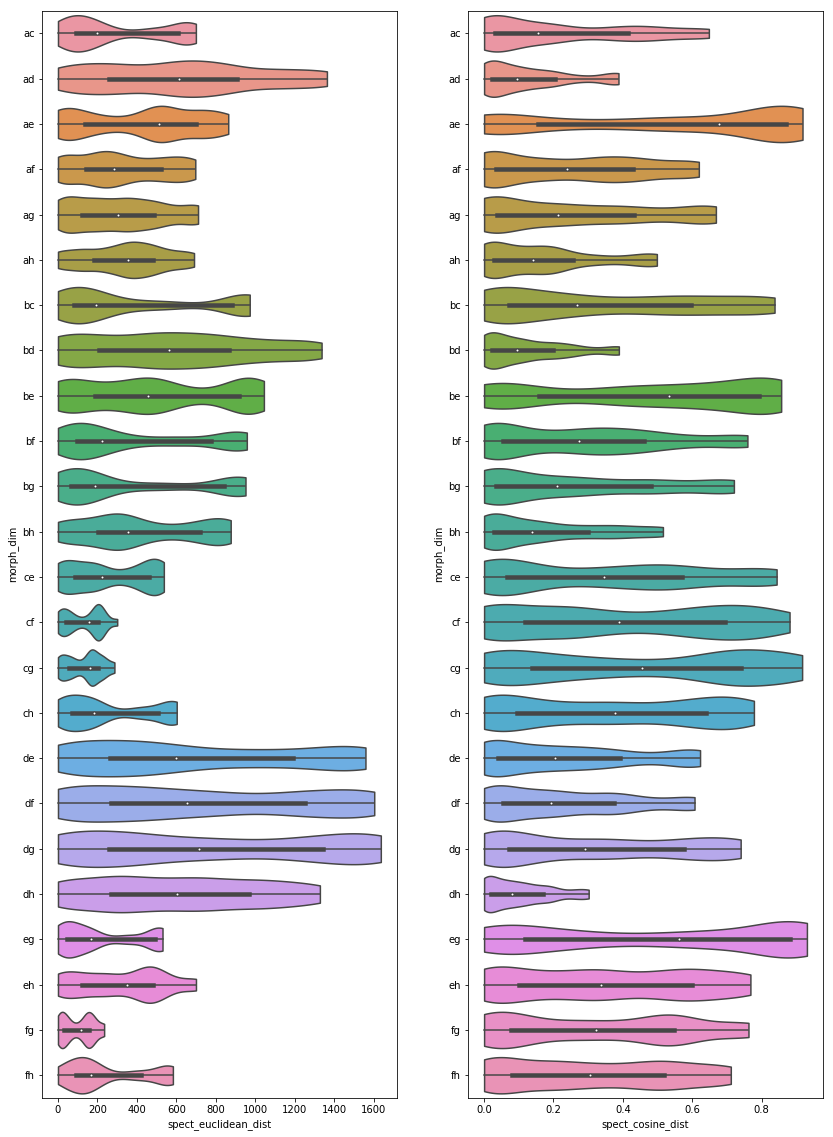

In [8]:
f = plt.figure(figsize=(14, 20))
g = sns.violinplot(
    x='spect_euclidean_dist',
    y='morph_dim',
    data=pair_df.sample(10000),
    scale='width',
    cut=0,
    ax=plt.subplot(1, 2, 1),
)
g = sns.violinplot(
    x='spect_cosine_dist',
    y='morph_dim',
    data=pair_df.sample(10000),
    scale='width',
    cut=0,
    ax=plt.subplot(1, 2, 2),
)

The improvement in the spectrogram distances of going from euclidean to cosine distance may be related to registering or normalizing the distances across different morph dimensions, however, there are still significant differences in the distributions for each morph dimension so treating them separately is probably a good idea.